In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.stattools import grangercausalitytests
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filtered_panel = pd.read_csv(r'../../data/processed/final_panel_data.csv')

In [3]:
# ADF test on 'removals'
result_removals = adfuller(filtered_panel['removals'].dropna())
print("ADF Test for 'removals':")
print(f"ADF Statistic: {result_removals[0]}")
print(f"p-value: {result_removals[1]}")
print(f"Critical Values: {result_removals[4]}\n")

# ADF test on 'value'
result_value = adfuller(filtered_panel['value'].dropna())
print("ADF Test for 'value':")
print(f"ADF Statistic: {result_value[0]}")
print(f"p-value: {result_value[1]}")
print(f"Critical Values: {result_value[4]}")

ADF Test for 'removals':
ADF Statistic: -14.399560989623751
p-value: 8.55391782423222e-27
Critical Values: {'1%': np.float64(-3.431211745841305), '5%': np.float64(-2.8619208270926935), '10%': np.float64(-2.5669727097936335)}

ADF Test for 'value':
ADF Statistic: -9.263833891444925
p-value: 1.3839872499913315e-15
Critical Values: {'1%': np.float64(-3.431211973022116), '5%': np.float64(-2.861920927475029), '10%': np.float64(-2.5669727632284878)}


In [4]:
# Run Engle-Granger cointegration test
coint_stat, p_value, crit_values = coint(filtered_panel['removals'], filtered_panel['value'])

print(f"Engle-Granger Cointegration Test")
print(f"Test Statistic: {coint_stat}")
print(f"p-value: {p_value}")
print(f"Critical Values: {crit_values}")

Engle-Granger Cointegration Test
Test Statistic: -14.764643069793948
p-value: 2.0664019296029407e-26
Critical Values: [-3.89787689 -3.33693144 -3.04500627]


In [5]:
# Format data as a two-column array: [removals, value]
data = filtered_panel[['removals', 'value']].dropna()

# Run Granger causality test with up to 3 lags
grangercausalitytests(data, maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=58.9809 , p=0.0000  , df_denom=7622, df_num=1
ssr based chi2 test:   chi2=59.0041 , p=0.0000  , df=1
likelihood ratio test: chi2=58.7770 , p=0.0000  , df=1
parameter F test:         F=58.9809 , p=0.0000  , df_denom=7622, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=30.3658 , p=0.0000  , df_denom=7619, df_num=2
ssr based chi2 test:   chi2=60.7714 , p=0.0000  , df=2
likelihood ratio test: chi2=60.5304 , p=0.0000  , df=2
parameter F test:         F=30.3658 , p=0.0000  , df_denom=7619, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=22.5267 , p=0.0000  , df_denom=7616, df_num=3
ssr based chi2 test:   chi2=67.6421 , p=0.0000  , df=3
likelihood ratio test: chi2=67.3438 , p=0.0000  , df=3
parameter F test:         F=22.5267 , p=0.0000  , df_denom=7616, df_num=3


{np.int64(1): ({'ssr_ftest': (np.float64(58.980869162047135),
    np.float64(1.7903500749857318e-14),
    np.float64(7622.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(59.004083883575106),
    np.float64(1.573450632276756e-14),
    np.int64(1)),
   'lrtest': (np.float64(58.77696092311089),
    np.float64(1.765970435857325e-14),
    np.int64(1)),
   'params_ftest': (np.float64(58.98086916205305),
    np.float64(1.7903500749810885e-14),
    np.float64(7622.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(30.365757013840454),
    np.float64(7.3215249675414e-14),
    np.float64(7619.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(60.77136933285723),
    np.float64(6.363042449224967e-14),
    np.int64(2)),
   'lrtest': (np.float64(60.530442633222265),
    np.float64(7.177635313604365e-14),
    np.int64(2)),
   'params_ftest': (np.float64(30.36575701383994),
    np.float64(7.321524967544678e-14),
    np.float64(7619.0),
    2.0)},
   array([[0.,

In [6]:
# Prepare data: ensure it's sorted and aligned
df = filtered_panel[['removals', 'value']].dropna().copy()
df = df.astype(float)

# Run Granger causality test: does 'removals' Granger-cause 'value'?
# maxlag = 3 for testing 1, 2, 3 lags
reverse_granger_results = grangercausalitytests(df[['value', 'removals']], maxlag=3, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=59.6148 , p=0.0000  , df_denom=7622, df_num=1
ssr based chi2 test:   chi2=59.6382 , p=0.0000  , df=1
likelihood ratio test: chi2=59.4062 , p=0.0000  , df=1
parameter F test:         F=59.6148 , p=0.0000  , df_denom=7622, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.6099  , p=0.0001  , df_denom=7619, df_num=2
ssr based chi2 test:   chi2=19.2324 , p=0.0001  , df=2
likelihood ratio test: chi2=19.2081 , p=0.0001  , df=2
parameter F test:         F=9.6099  , p=0.0001  , df_denom=7619, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.9174  , p=0.0021  , df_denom=7616, df_num=3
ssr based chi2 test:   chi2=14.7657 , p=0.0020  , df=3
likelihood ratio test: chi2=14.7514 , p=0.0020  , df=3
parameter F test:         F=4.9174  , p=0.0021  , df_denom=7616, df_num=3


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [7]:
# Run OLS regression with fixed effects for LA and year
model = smf.ols(
    formula='removals ~ value + C(local_authority) + C(financial_year) + C(size_category)+value:C(size_category)',
    data=filtered_panel
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               removals   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     51.10
Date:                Fri, 18 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:05:43   Log-Likelihood:                -20849.
No. Observations:                7626   AIC:                         4.232e+04
Df Residuals:                    7317   BIC:                         4.446e+04
Df Model:                         308                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [8]:
model = smf.ols(
    formula=(
        'removals ~ '
        'value + value_lag1 + value_lag2 + value_lag3 + '
        'C(local_authority) + C(financial_year) + C(size_category) + '
        'value:C(size_category) + '
        'value_lag1:C(size_category) + '
        'value_lag2:C(size_category) + '
        'value_lag3:C(size_category)'
    ),
    data=filtered_panel
).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               removals   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     34.92
Date:                Fri, 18 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:05:43   Log-Likelihood:                -13492.
No. Observations:                4962   AIC:                         2.761e+04
Df Residuals:                    4648   BIC:                         2.966e+04
Df Model:                         313                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [9]:
top10_removals = filtered_panel.sort_values('removals', ascending=False).head(30)
print(top10_removals[['local_authority', 'financial_year', 'removals', 'value', 'size_category']])

      local_authority  financial_year  removals    value size_category
7240      westminster          2019.0        71   23.431         Small
4534  north yorkshire          2018.0        70    7.503         Small
4537  north yorkshire          2021.0        69    6.349         Small
4532  north yorkshire          2016.0        66    8.831         Small
4535  north yorkshire          2019.0        64    9.843         Small
4538  north yorkshire          2022.0        62    8.708         Small
208            barnet          2019.0        60   11.125         Small
415        birmingham          2019.0        58   70.092         Small
5497         somerset          2015.0        55    7.729         Small
5503         somerset          2021.0        54    9.027         Small
7318        wiltshire          2019.0        52   15.853         Small
1072           camden          2019.0        52   65.115         Small
1494         cornwall          2021.0        51    8.954         Small
417   

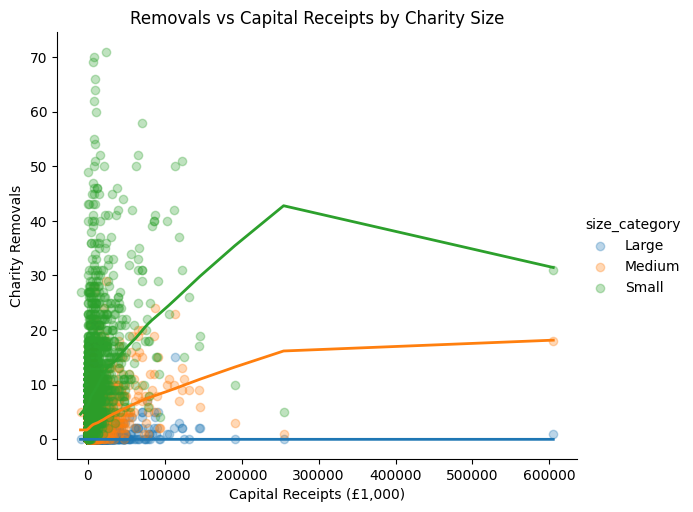

In [10]:
filtered_panel_1 = filtered_panel.copy()
filtered_panel_1['value_thousands'] = filtered_panel_1['value'] * 1000

sns.lmplot(
    data=filtered_panel_1,
    x='value_thousands', y='removals',
    hue='size_category',  # group by charity size
    lowess=True,
    scatter_kws={'alpha':0.3},
    line_kws={'linewidth':2},
    height=5, aspect=1.2
)

plt.xlabel('Capital Receipts (£1,000)')
plt.ylabel('Charity Removals')
plt.title('Removals vs Capital Receipts by Charity Size')
plt.show()

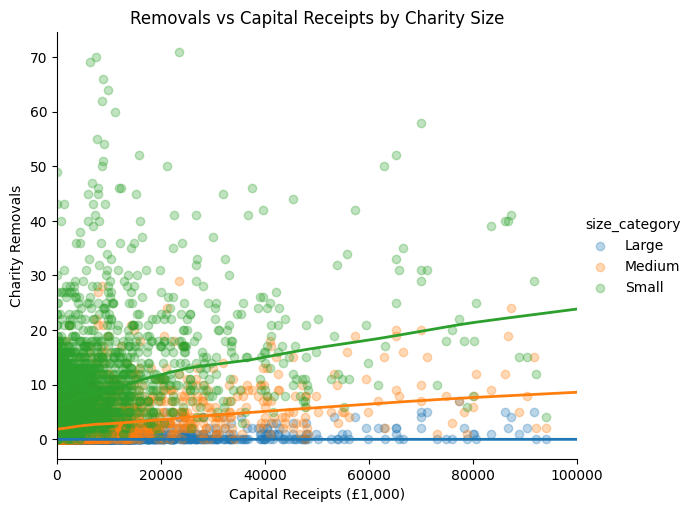

In [11]:
sns.lmplot(
    data=filtered_panel_1,
    x='value_thousands', y='removals',
    hue='size_category',
    lowess=True,
    scatter_kws={'alpha':0.3},
    line_kws={'linewidth':2},
    height=5, aspect=1.2
)

plt.xlabel('Capital Receipts (£1,000)')
plt.ylabel('Charity Removals')
plt.title('Removals vs Capital Receipts by Charity Size')
plt.xlim(0, 100000)  # limit to £100 million
plt.show()
